# Agglomerative clustering

In [11]:
import pandas as pd
import numpy as np

In [2]:
raw = pd.read_csv("WholesaleCustomersData.csv")

In [3]:
raw.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
raw['Grocery_Frozen'] = raw['Grocery'] + raw['Frozen'] + raw['Detergents_Paper']
raw['Edibles'] = raw['Fresh'] + raw['Milk'] + raw['Delicassen']

In [5]:
raw.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Grocery_Frozen,Edibles
0,2,3,12669,9656,7561,214,2674,1338,10449,23663
1,2,3,7057,9810,9568,1762,3293,1776,14623,18643
2,2,3,6353,8808,7684,2405,3516,7844,13605,23005
3,1,3,13265,1196,4221,6404,507,1788,11132,16249
4,2,3,22615,5410,7198,3915,1777,5185,12890,33210


In [6]:
raw.isnull().sum()
X = raw.copy()

In [7]:
X = raw.iloc[:,[8,9]].values

In [8]:
X.shape

(440, 2)

Number of clusters: 4


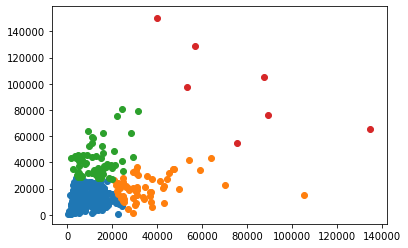

In [13]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
import matplotlib.pyplot as plt 

model = KMeans(n_clusters=4)
yhat = model.fit_predict(X)


clusters = unique(yhat)
print("Number of clusters:", len(clusters))

for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    
pyplot.show()

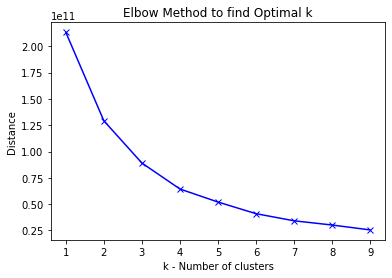

In [14]:
distances = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k)
    model = model.fit(X)
    distances.append(model.inertia_)
    
plt.plot(K, distances, 'bx-')
plt.xlabel('k - Number of clusters')
plt.ylabel('Distance')
plt.title('Elbow Method to find Optimal k')
plt.show()

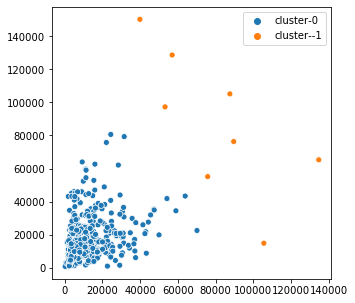

In [15]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt 

model = DBSCAN (eps=20000, min_samples=10)
X_df = pd.DataFrame(X)
yhat = model.fit(X)

clusters = yhat.labels_

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in clusters])


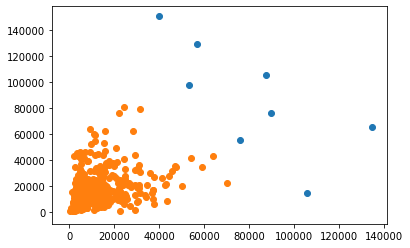

In [42]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

model = DBSCAN(eps=20000, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Number of clusters: 2


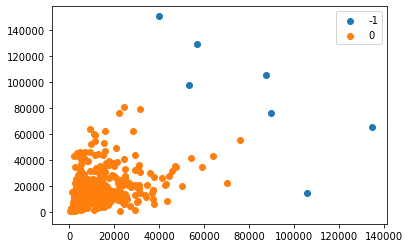

In [62]:
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
import seaborn as sns

model = DBSCAN (eps=20000, min_samples=4)
X_df = pd.DataFrame(X)
yhat = model.fit_predict(X)

clusters = unique(yhat)
print("Number of clusters:", len(clusters))

for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

pyplot.legend(clusters)    
pyplot.show()

In [49]:
clusters

array([-1,  0], dtype=int64)

No handles with labels found to put in legend.


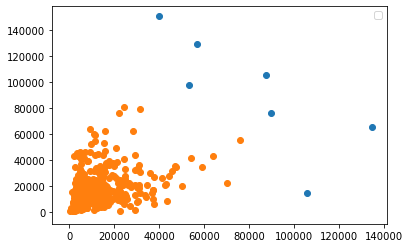

In [51]:
print(Counter(model.labels_))

NameError: name 'Counter' is not defined

In [81]:
print('Outliers:')
print(X_df[model.labels_ == -1])

Outliers:
          0       1
47    87524  105190
61    89553   76328
85   134633   65258
86    53171   97326
181   39841  150328
183   56943  128740
325   75767   55110
333  105531   14760


Eps: 2000
Counter({-1: 196, 2: 179, 1: 32, 0: 24, 3: 9})
         0      1
1    14623  18643
3    11132  16249
4    12890  33210
6    10595  15870
9    27465  19197
..     ...    ...
427  20950  48862
431  20023  15537
435  29344  43958
436   5367  43005
437  45521  31886

[196 rows x 2 columns]
Eps: 5000
Counter({0: 368, -1: 60, 1: 12})
          0       1
12    15925   46964
13    24784   28027
23    31510   79319
28    35719   29803
39    11116   59630
43    34314   11797
45    30624   32210
47    87524  105190
49    44302   27542
56    47222   35330
61    89553   76328
65    70095   22467
71    30588   34029
77    41443   25911
85   134633   65258
86    53171   97326
87    16008   62641
92    54172   41800
93    37142   17102
103   28414   62084
125   24418   80628
142   11268   44191
145   47425   34853
163   42963   21703
165   31391   30647
171   29240   32312
173   30578    8907
176   15436   52828
181   39841  150328
183   56943  128740
193   26869    4331
196   24371   40709


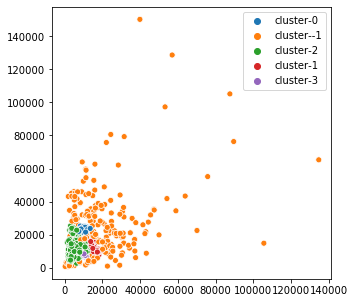

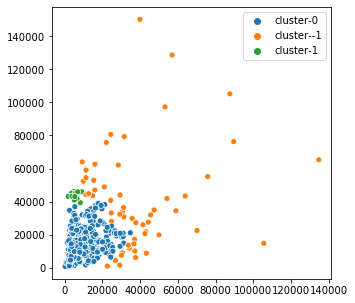

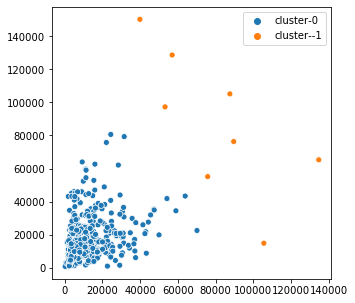

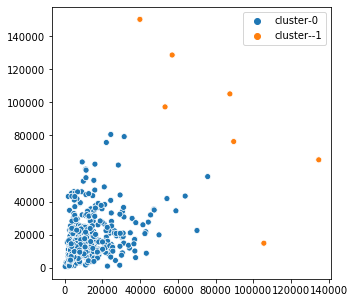

In [62]:
for i in [2000, 5000, 20000, 30000]:
    model = DBSCAN (eps=i, min_samples=10)

    yhat = model.fit(X)

    clusters = yhat.labels_

    print('Eps:', i)
    fig = plt.figure(figsize=(5, 5))
    sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in clusters])
    
    # Creating Panda DataFrame with Labels for Outlier Detection
    outlier_df = pd.DataFrame(X)

    # Printing total number of values for each label
    print(Counter(model.labels_))

    # Printing DataFrame being considered as Outliers -1
    print(outlier_df[model.labels_ == -1])


In [79]:
print("Number of clusters:", len(clusters))

Number of clusters: 440


In [72]:
where(X[:,1] < 1000)

(array([ 97,  98, 154, 338], dtype=int64),)

In [46]:
X[181]

array([ 39841, 150328], dtype=int64)

In [45]:
X[183]

array([ 56943, 128740], dtype=int64)

In [19]:
from scipy.spatial import distance
dp1 = X[181]
dp2 = X[183]
Euc_dist = distance.euclidean(dp1, dp2)
print("Euclidean distance: ",Euc_dist)

Euclidean distance:  27541.244488947843


In [ ]:
from scipy.spatial import distance
dp1 = X[98]
dp2 = X[97]
Euc_dist = distance.euclidean(dp1, dp2)
print("Euclidean distance: ",Euc_dist)

In [77]:
import pandas as pd
import sys
from sklearn.cluster import DBSCAN
from collections import Counter


data = X

# DBSCAN model with parameters
model = DBSCAN(eps=20000, min_samples=10).fit(X)

# Creating Panda DataFrame with Labels for Outlier Detection
data_df = pd.DataFrame(data)

# Printing total number of values for each label
print(Counter(model.labels_))

# Printing DataFrame being considered as Outliers -1
print(data_df[model.labels_ == -1])



Counter({0: 432, -1: 8})
          0       1
47    87524  105190
61    89553   76328
85   134633   65258
86    53171   97326
181   39841  150328
183   56943  128740
325   75767   55110
333  105531   14760
<class 'pandas.core.frame.DataFrame'>


In [76]:
data_df.columns

RangeIndex(start=0, stop=2, step=1)

In [65]:
data

array([[ 10449,  23663],
       [ 14623,  18643],
       [ 13605,  23005],
       [ 11132,  16249],
       [ 12890,  33210],
       [  7587,  19123],
       [ 10595,  15870],
       [ 14416,  15101],
       [  8333,  10361],
       [ 27465,  19197],
       [ 23351,  10513],
       [  6492,  14767],
       [ 15925,  46964],
       [ 24784,  28027],
       [ 17443,  36286],
       [  5182,  11779],
       [ 16763,  10916],
       [  4142,  16511],
       [ 15071,  28109],
       [ 12651,  10776],
       [  7927,  24189],
       [  5768,   7007],
       [ 16258,  37527],
       [ 31510,  79319],
       [ 21189,  38201],
       [ 11799,  20452],
       [  6254,  11692],
       [  3630,  15597],
       [ 35719,  29803],
       [  4916,  46011],
       [ 14389,  25388],
       [  6041,   7936],
       [  4070,  23355],
       [ 13817,  35598],
       [  3170,   3876],
       [ 16163,   6615],
       [  8019,  38943],
       [ 20903,  26438],
       [ 23698,  20753],
       [ 11116,  59630],


In [28]:
where(distances[:,1] < 10000)

TypeError: tuple indices must be integers or slices, not tuple

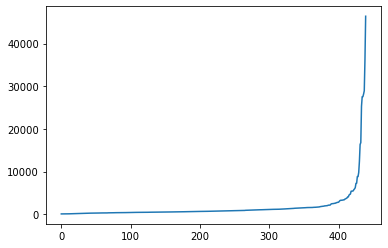

In [40]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [34]:
distances = distances[:,1]

plt.plot(distances)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [58]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(
 eps = 9000, 
 metric='euclidean', 
 min_samples = 5,
 n_jobs = -1)
clusters = outlier_detection.fit_predict(X)

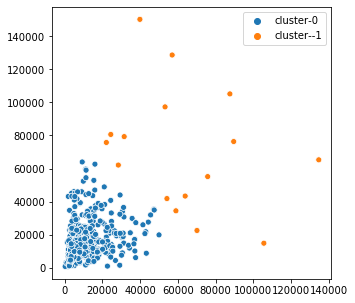

In [59]:
"""from matplotlib import cm
cmap = cm.get_cmap('Set1')
plt.scatter(X[:,0], X[:,1], c=clusters, cmap=cmap, colorbar = False)"""

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in clusters])

Number of Clusters:  33


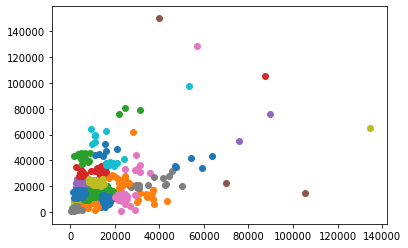

In [65]:
from sklearn.cluster import AffinityPropagation 
from sklearn import metrics  
from numpy import where
from matplotlib import pyplot
  
model = AffinityPropagation(max_iter=200)

yhat = model.fit_predict(X)

clusters = unique(yhat)
print("Number of Clusters: ", len(clusters))

for cluster in clusters:
    row_ix = where(yhat == cluster)
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

pyplot.show()

In [48]:
from sklearn.cluster import AffinityPropagation 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 
  

# Compute Affinity Propagation 
model = AffinityPropagation(max_iter=200, damping=0.5).fit(X) 
cluster_centers_indices = model.cluster_centers_indices_ 
labels = model.labels_ 
  
n_clusters_ = len(cluster_centers_indices) 
print(n_clusters_)

33


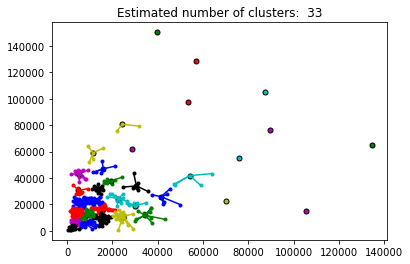

In [49]:
# Plot result 
import matplotlib.pyplot as plt 
from itertools import cycle 
  
plt.close('all') 
plt.figure(1) 
plt.clf() 
  
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk') 
  
for k, col in zip(range(n_clusters_), colors): 
    class_members = labels == k 
    cluster_center = X[cluster_centers_indices[k]] 
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.') 
    plt.plot(cluster_center[0], cluster_center[1], 'o', 
             markerfacecolor = col, markeredgecolor ='k', 
             markersize = 5) 
  
    for x in X[class_members]: 
        plt.plot([cluster_center[0], x[0]],[cluster_center[1], x[1]], col) 


plt.title('Estimated number of clusters: % d' % n_clusters_) 
plt.show() 